# Syntactic score functions

## Yes/No question classification

In [20]:
def is_yes_no_question(question):
    question = question.lower().strip()
    #purposely has space after words since it should be a word in itself as part of a sentence
    if question.startswith(('is ', 'are ', 'do ', 'does ', 'did ', 'was ', 'were ', 'will ', 'can ', 'could ', 'should ', 'have ', 'has ', 'had ')): 
        return 1
    else:
        return 0

def is_yes_no_answer(answer):
    answer = answer.lower().strip()
    if answer.startswith(('yes','no')):
        return 1
    else:
        return 0

def evaluate_type_coherency(question,answer):
    if is_yes_no_question(question)==is_yes_no_answer(answer):
        return 1
    else:
        return 0


# Test the function
sentences = [
    "Is this right?",
    "Which questions are you thinking of?",
    "Hassan",
    'Has an'
]

for sentence in sentences:
    is_yes_no = is_yes_no_question(sentence)
    print(f"Sentence: {sentence}")
    print(f"Is yes/no type question: {is_yes_no:.2f}\n")

# Test the function
sentences = [
    "Is this right?",
    "Which questions are you thinking of?",
    "Hassan",
    'Has an',
    'Yes!',
    'No.',
    'Maybe'
]

for sentence in sentences:
    q_is_yes_no = is_yes_no_question(sentence)
    a_is_yes_no = is_yes_no_answer(sentence)
    print(f"Sentence: {sentence}")
    print(f"Is yes/no type question: {q_is_yes_no:.2f}")
    print(f"Is yes/no type answer: {a_is_yes_no:.2f}\n")

Sentence: Is this right?
Is yes/no type question: 1.00

Sentence: Which questions are you thinking of?
Is yes/no type question: 0.00

Sentence: Hassan
Is yes/no type question: 0.00

Sentence: Has an
Is yes/no type question: 1.00

Sentence: Is this right?
Is yes/no type question: 1.00
Is yes/no type answer: 0.00

Sentence: Which questions are you thinking of?
Is yes/no type question: 0.00
Is yes/no type answer: 0.00

Sentence: Hassan
Is yes/no type question: 0.00
Is yes/no type answer: 0.00

Sentence: Has an
Is yes/no type question: 1.00
Is yes/no type answer: 0.00

Sentence: Yes!
Is yes/no type question: 0.00
Is yes/no type answer: 1.00

Sentence: No.
Is yes/no type question: 0.00
Is yes/no type answer: 1.00

Sentence: Maybe
Is yes/no type question: 0.00
Is yes/no type answer: 0.00



## Conciseness

In [3]:
import spacy
from nltk.tokenize import word_tokenize
import numpy as np

# Load the spaCy model for linguistic features
nlp = spacy.load("en_core_web_sm")

def evaluate_conciseness(answer, debug=False):
    # Tokenize the answer and analyze with spaCy
    if len(answer)==0: 
        return 0

    doc = nlp(answer)
    word_count = len(word_tokenize(answer))
    punctuation_count = sum(token.pos == spacy.symbols.PUNCT for token in doc)
    relevant_words=word_count-punctuation_count

    # content words NOUN and VERB
    content_words_count = sum(token.pos in [spacy.symbols.NOUN, spacy.symbols.VERB] for token in doc)
    
    # Consider yes/no as content if it is the first token
    first_token_is_yes_no = doc[0].text.lower() in ["yes", "no"]
    if first_token_is_yes_no:
        content_words_count += 1
    
    conciseness_score=content_words_count/relevant_words

    if debug==True:
        print('Answer:', answer)
        print('Word count:',word_count, 
              'Punctuation count', punctuation_count, 
              'Content words count:', content_words_count, 
              'Relevant words:', relevant_words, 
              '|Conciseness score:', conciseness_score)

    return conciseness_score

# Test the function
answers = [
    "Yes.",
    'No no!',
    'Yes, no, maybe so',
    'no it is not',
    "The cat sat on the mat.",
    'The spectacular looking blue cat sat on the beautiful mat looking towards the sky',
    ''
]

for answer in answers:
    score = evaluate_conciseness(answer,debug=True)
    print('')

Answer: Yes.
Word count: 2 Punctuation count 1 Content words count: 1 Relevant words: 1 |Conciseness score: 1.0

Answer: No no!
Word count: 3 Punctuation count 1 Content words count: 1 Relevant words: 2 |Conciseness score: 0.5

Answer: Yes, no, maybe so
Word count: 6 Punctuation count 2 Content words count: 1 Relevant words: 4 |Conciseness score: 0.25

Answer: no it is not
Word count: 4 Punctuation count 0 Content words count: 1 Relevant words: 4 |Conciseness score: 0.25

Answer: The cat sat on the mat.
Word count: 7 Punctuation count 1 Content words count: 3 Relevant words: 6 |Conciseness score: 0.5

Answer: The spectacular looking blue cat sat on the beautiful mat looking towards the sky
Word count: 14 Punctuation count 0 Content words count: 6 Relevant words: 14 |Conciseness score: 0.42857142857142855




## Fluency

In [61]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def evaluate_syntax_fluency(sentence, debug=False):
    doc = nlp(sentence)

    # Heuristics for scoring
    score = 0
    max_score = 5  # Total number of checks

    # Check 1: Sentence has a verb  
    has_verb = any(token.pos_ == "VERB" for token in doc)
    score += 1 if has_verb else 0

    # Check 2: Sentence has a nominal subject  
    has_subject = any(token.dep_ == "nsubj" or token.dep_ == "nsubjpass" for token in doc)
    score += 1 if has_subject else 0

    # Check 3: Reasonable sentence length (not too long or too short)
    # Assuming a sentence should typically be between 3 and 20 words for simplicity
    has_reasonable_length = 1 if 3 <= len(doc) <= 20 else 0
    score += has_reasonable_length

    # Check 4: Variety in sentence structure (using different parts of speech)
    unique_pos = len(set(token.pos_ for token in doc))
    if unique_pos >= 4:  # Arbitrary threshold for variety
        score += 1

    # Check 5: Coherence in dependency structure (root should be a verb or an auxiliary verb)
    has_coherent_structure = doc[0].dep_ == "ROOT" and doc[0].pos_ in ["VERB", "AUX"]
    score += 1 if has_coherent_structure else 0

    # Calculate final score
    fluency_score = score / max_score

    if debug==True:
        print(
        'Sentence', sentence, '\n',
        'Has verb:',has_verb, 
        '|Has subject:', has_subject, 
        '|Reasonable length:', has_reasonable_length, 
        '|Unique POS:', unique_pos, 
        '|Coherent structure:',has_coherent_structure,
        '||Fluency score:', fluency_score
        )

    return fluency_score

# Test the function
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "The fox jumped over the dog.",
    "Running fast.",
    "Incomprehensible fragment lacking verb",
    "The",
    "Excessively lengthy sentence with a lot of redundant and unnecessary words causing it to be overly verbose and lose coherence.",
    'Yes'
]

for sentence in sentences:
    score = evaluate_syntax_fluency(sentence, debug=True)


Sentence The quick brown fox jumps over the lazy dog. 
 Has verb: True |Has subject: True |Reasonable length: 1 |Unique POS: 6 |Coherent structure: False ||Fluency score: 0.8
Sentence The fox jumped over the dog. 
 Has verb: True |Has subject: True |Reasonable length: 1 |Unique POS: 5 |Coherent structure: False ||Fluency score: 0.8
Sentence Running fast. 
 Has verb: True |Has subject: False |Reasonable length: 1 |Unique POS: 3 |Coherent structure: True ||Fluency score: 0.6
Sentence Incomprehensible fragment lacking verb 
 Has verb: False |Has subject: True |Reasonable length: 1 |Unique POS: 2 |Coherent structure: False ||Fluency score: 0.4
Sentence The 
 Has verb: False |Has subject: False |Reasonable length: 0 |Unique POS: 1 |Coherent structure: False ||Fluency score: 0.0
Sentence Excessively lengthy sentence with a lot of redundant and unnecessary words causing it to be overly verbose and lose coherence. 
 Has verb: True |Has subject: True |Reasonable length: 0 |Unique POS: 11 |Coher

## Syntactic score

In [62]:
def syntactic_score(question, answer, weights_IS_yes_no=[3,1,2], weights_NOT_yes_no=[1,3,2], debug=False, extra_outputs='False'):
    
    #only question and answer are strictly required. Others are set to default values of equal weights, no print out and no additional outputs
    #There are 2 sets of weights since answers to YES/NO type questions are not comparable to non Yes/No type
    #weights are of coherency, fluency and conciseness are proportions which are scaled to 0 and 1 within the function. 
    
    # Default values have the following logic:
    # if IS a Yes/No type, then fluency is less relevant since short answers are generally not fluent. Better answers should be coherent first and concise second, thus weights_IS_yes_no=[3,1,2]
    # if NOT a Yes/No type, then fluency is deemed more important than conciseness. Coherency in this case represents answering in the "wrong format", thus weights_NOT_yes_no=[1,3,2]
    

    is_yes_no_type=is_yes_no_question(question)
    coherency = evaluate_type_coherency(question,answer)
    fluency=evaluate_syntax_fluency(answer)
    conciseness=evaluate_conciseness(answer)
    
    #choose adequate weights for the case
    if is_yes_no_type==1:
        weights=weights_IS_yes_no   
    else:
        weights=weights_NOT_yes_no   

    #calulate score as weighted average
    syntactic_score=(coherency*weights[0]+fluency*weights[1]+conciseness*weights[2])/np.sum(weights)

    #print out for debug
    if debug==True:
        print('Q:',question,
              '|YES/NO TYPE:',is_yes_no_type, 
              '||A:',answer,
              '|COHERENCY(',weights[0],'):',coherency, 
              '|FLUENCY(',weights[1],'):', fluency, 
              '|CONCISENESS(',weights[2],'):',conciseness,
              '||SYNTACTIC SCORE:',syntactic_score
               ) 
    
    #return outputs
    if extra_outputs==True:
        return syntactic_score, is_yes_no_type, coherency, fluency, conciseness
    else:
        return syntactic_score

In [63]:
# Examples putting it all together
questions=['Are dogs pets?',  
           'Is a dog a pet?',
           'Is your dog a pet?',
           'A pet is a dog?',

           'Is it Saturday?',  
           'Is it Saturday today?',  
           'Is today Saturday',
           'Not a question'
           ]

answers=['I dont know',
         'Yes it is',
         'Yes!',
         'A pet it is',

         'It is not Saturday',
         'No',
         'Saturday it is not',
         'The'

        ]

# Test the function
for i in range(len(questions)):
    syntactic_score_=syntactic_score(questions[i],answers[i],debug=True)

Q: Are dogs pets? |YES/NO TYPE: 1 ||A: I dont know |COHERENCY( 3 ): 0 |FLUENCY( 1 ): 0.8 |CONCISENESS( 2 ): 0.3333333333333333 ||SYNTACTIC SCORE: 0.24444444444444446
Q: Is a dog a pet? |YES/NO TYPE: 1 ||A: Yes it is |COHERENCY( 3 ): 1 |FLUENCY( 1 ): 0.4 |CONCISENESS( 2 ): 0.3333333333333333 ||SYNTACTIC SCORE: 0.6777777777777777
Q: Is your dog a pet? |YES/NO TYPE: 1 ||A: Yes! |COHERENCY( 3 ): 1 |FLUENCY( 1 ): 0.0 |CONCISENESS( 2 ): 1.0 ||SYNTACTIC SCORE: 0.8333333333333334
Q: A pet is a dog? |YES/NO TYPE: 0 ||A: A pet it is |COHERENCY( 1 ): 1 |FLUENCY( 3 ): 0.6 |CONCISENESS( 2 ): 0.25 ||SYNTACTIC SCORE: 0.5499999999999999
Q: Is it Saturday? |YES/NO TYPE: 1 ||A: It is not Saturday |COHERENCY( 3 ): 0 |FLUENCY( 1 ): 0.6 |CONCISENESS( 2 ): 0.0 ||SYNTACTIC SCORE: 0.09999999999999999
Q: Is it Saturday today? |YES/NO TYPE: 1 ||A: No |COHERENCY( 3 ): 1 |FLUENCY( 1 ): 0.0 |CONCISENESS( 2 ): 1.0 ||SYNTACTIC SCORE: 0.8333333333333334
Q: Is today Saturday |YES/NO TYPE: 1 ||A: Saturday it is not |CO

# QA Dataset application

## Dataloader

In [41]:
# Change to appropriate local file path
%cd '/content/drive/MyDrive/2023-FALL/11-611 NLP/NLP Project Ideas'

[WinError 3] The system cannot find the path specified: "'/content/drive/MyDrive/2023-FALL/11-611 NLP/NLP Project Ideas'"
h:\My Drive\2023-FALL\11-611 NLP\Project


In [42]:

import torch
from torch.utils.data import Dataset
import os
import numpy as np


class CustomData(Dataset):

    def __init__(self, file_dir):
        self.file = file_dir
        self.article_name = []
        self.questions = []
        self.answers = []
        self.q_diffi = []
        self.a_diffi = []
        self.article_path = []
        self.context = {} # only fill when load the dataset

        # get question answer pairs
        for div in ['S08', 'S09', 'S10']:
          skip = True
          qa_path = os.path.join(self.file, div, "question_answer_pairs.txt")
          with open(qa_path, 'rb') as f:
            for line in f:
              if skip:
                skip = False
                continue
              try:
                row = line.decode().split('\t')
              except:
                continue
              # print(row)
              if "NULL" in row:
                continue # if any feature does not exist -> skip
              self.article_name.append(row[0])
              self.questions.append(row[1])
              self.answers.append(row[2])
              self.q_diffi.append(row[3])
              self.a_diffi.append(row[4])
              self.article_path.append(div + "/"+ row[5][:-1]) # get rid of '\n

        print("length of dataset: ", len(self.questions))


    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):

        # retrieve context here -> less mem storage overhead
        try:
          curr_context = self.context[self.article_name[idx]]
        except KeyError:
          context_file = self.file + "/" + self.article_path[idx] + ".txt"
          # read all content, including the related items
          with open(context_file, 'rb') as f:
            curr_context = f.read().decode().replace('\n',' ')
          self.context[self.article_name[idx]] = curr_context

        #return self.questions[idx], self.answers[idx], curr_context
        return (self.article_name[idx],
                self.questions[idx],
                self.answers[idx],
                self.q_diffi[idx],
                self.a_diffi[idx],
                self.article_path[idx],
                curr_context
                )


In [45]:
# Load data using CustomData function
data_path = 'Question_Answer_Dataset_v1.2'
dataset = CustomData(data_path)
# Print random set for data exploration
n=len(dataset)
n_show=1

rand_range=np.random.randint(0,n,n_show)

for line in rand_range:
  print('line:',line)
  print("article_name: ", dataset.article_name[line])
  print("question: ", dataset.questions[line])
  print("answer: ", dataset.answers[line])
  print("q_diffi: ", dataset.q_diffi[line])
  print("a_diffi: ", dataset.a_diffi[line])
  print("article_path: ", dataset.article_path[line])
  print("article: ", dataset[line][6])
  print('\n')

length of dataset:  2725
line: 1239
article_name:  Cello
question:  What does violincello mean?
answer:  Violincello means "little violene".
q_diffi:  medium
a_diffi:  medium
article_path:  S09/data/set2/a9
article:  Cello    The violoncello (abbreviated to cello, or  'cello,  plural cellos or celli—the c is  , as in the ch in "check", thus "chel-lo") is a bowed string instrument. A person who plays a cello is called a cellist. The cello is used as a solo instrument, in chamber music, and as a member of the string section of an orchestra.    Study of a three-quarter size cello. The name Cello is an abbreviation of the Italian violoncello, which means "little violone", referring to the violone ("big viol"), the lowest-pitched instrument of the viol family, the group of string instruments that were superseded by the violin family. Thus, the name carries both an augmentative "-one" ("big") and a diminutive "-cello" ("little"). Cellos are tuned in fifths, starting with C2 (two octaves belo

## Syntactic score application

In [74]:
import random

#make random selection
n=500 #random sample to get from len(dataset)  
random_select=random.sample(range(len(dataset)), n) #Sometime fails because of UTF 

In [75]:
# Get scores
scores=[]
for line in random_select: #range(n):
    q=dataset.questions[line]
    a=dataset.answers[line]
    #print('difficulty:',dataset.q_diffi[line],dataset.a_diffi[line])
   
    scores.append(syntactic_score(q, #question
                                  a, #answer
                                  #weights_IS_yes_no=[1,0,1], #weights of coherency, fluency and conciseness in case of Yes/No type question
                                  #weights_NOT_yes_no=[1,3,2], #weights of coherency, fluency and conciseness in case of NOT Yes/No type question
                                  debug=False, #print out for debugging
                                  extra_outputs=True) #output syntactic score, coherency, fluency, conciseness (last 3 are the 'extra')
                                  ) 



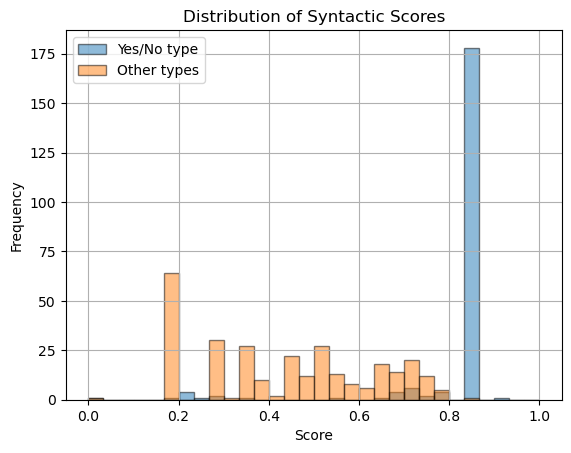

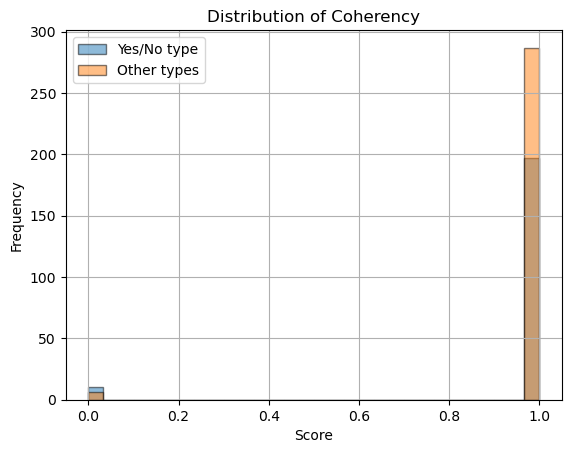

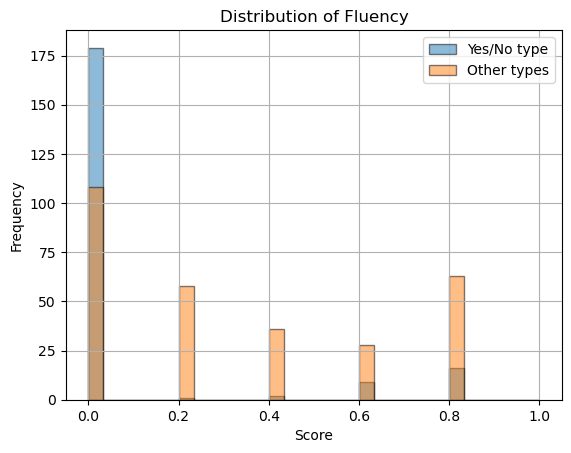

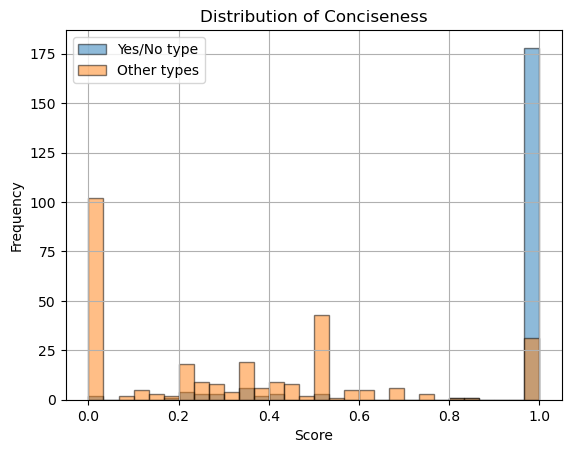

In [76]:
# Score distribution

import numpy as np
import matplotlib.pyplot as plt

#syntactic_score, is_yes_no_type, coherency, fluency, conciseness
#histogram of score
scores=np.array(scores)
ind_yn=scores[:,1]==1 #Yes/No type

plt.hist(scores[ind_yn,0], bins=30, range=(0,1), edgecolor='black', alpha=0.5, label='Yes/No type')
plt.hist(scores[~ind_yn,0], bins=30, range=(0,1), edgecolor='black', alpha=0.5, label='Other types')
plt.title('Distribution of Syntactic Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

#histogram of coherency

plt.hist(scores[ind_yn,2], bins=30, range=(0,1), edgecolor='black', alpha=0.5, label='Yes/No type')
plt.hist(scores[~ind_yn,2], bins=30, range=(0,1), edgecolor='black', alpha=0.5, label='Other types')
plt.title('Distribution of Coherency')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

#histogram of fluency

plt.hist(scores[ind_yn,3], bins=30, range=(0,1), edgecolor='black', alpha=0.5, label='Yes/No type')
plt.hist(scores[~ind_yn,3], bins=30, range=(0,1), edgecolor='black', alpha=0.5, label='Other types')
plt.title('Distribution of Fluency')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

#histogram of conciseness

plt.hist(scores[ind_yn,4], bins=30, range=(0,1), edgecolor='black', alpha=0.5, label='Yes/No type')
plt.hist(scores[~ind_yn,4], bins=30, range=(0,1), edgecolor='black', alpha=0.5, label='Other types')
plt.title('Distribution of Conciseness')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

In [51]:
# evaluation of question and answer match

n=len(dataset)
q_yes=0
a_yes=0
match_y=0
match_n=0
for line in range(n):

    q_y=is_yes_no_question(dataset.questions[line]) 
    a_y=is_yes_no_answer(dataset.answers[line])

    print(dataset.questions[line],'|', q_y,'|', dataset.answers[line],'|', a_y)
    q_yes+=q_y
    a_yes+=a_y
    match_y+=q_y*a_y
    match_n+=(1-q_y)*(1-a_y)

print('Total Match:',(match_y+match_n)/n)
print('(Question is Y/N):',)
print(q_yes, a_yes, match_y, match_n)

Was Abraham Lincoln the sixteenth President of the United States? | 1 | yes | 1
Was Abraham Lincoln the sixteenth President of the United States? | 1 | Yes. | 1
Did Lincoln sign the National Banking Act of 1863? | 1 | yes | 1
Did Lincoln sign the National Banking Act of 1863? | 1 | Yes. | 1
Did his mother die of pneumonia? | 1 | no | 1
Did his mother die of pneumonia? | 1 | No. | 1
How many long was Lincoln's formal education? | 0 | 18 months | 0
How many long was Lincoln's formal education? | 0 | 18 months. | 0
When did Lincoln begin his political career? | 0 | 1832 | 0
When did Lincoln begin his political career? | 0 | 1832. | 0
What did The Legal Tender Act of 1862 establish? | 0 | the United States Note, the first paper currency in United States history | 0
What did The Legal Tender Act of 1862 establish? | 0 | The United States Note, the first paper currency in United States history. | 0
Who suggested Lincoln grow a beard? | 0 | 11-year-old Grace Bedell | 0
Who suggested Lincoln g